In [7]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
root_path = os.getcwd()
img_path = os.path.join(root_path, "test_imgs", "shop_invoice.png")
input_img = cv2.imread(img_path)
print(input_img.size)
plt.imshow(input_img)

In [ ]:
gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

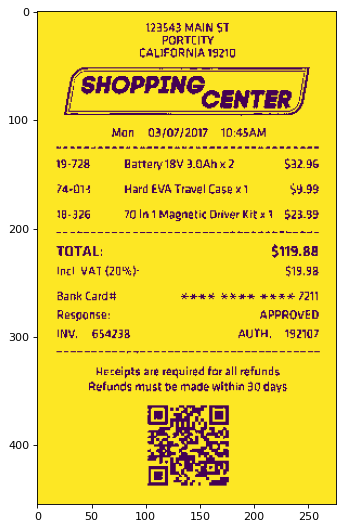

In [37]:
threshold_img = cv2.threshold(
    src=gray_img, 
    thresh=50, 
    maxval=100, 
    type=8,
)[1]

figure(figsize=(12,8), dpi=80)
plt.imshow(threshold_img)

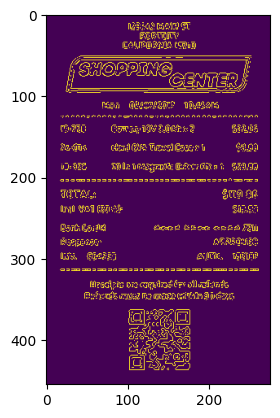

In [38]:
# Canny Edge Detection 

canny_edges = cv2.Canny(image=threshold_img, 
                        threshold1=50, 
                        threshold2=200, 
                        edges=None, 
                        apertureSize=3)
plt.imshow(canny_edges)

In [41]:
# Hough Line Detection 
import math
import numpy as np

rho = 1 # distance resolution in pixels of the Hough grid 
theta = np.pi / 180 # angular resolution in radians of the Hough grid 
threshold = 15
min_line_length = 230
max_line_gap = 20

lines = cv2.HoughLinesP(
    image=canny_edges, 
    rho= rho, 
    theta=theta, 
    threshold=threshold, 
    lines=np.array([]),

    minLineLength=min_line_length, 
    maxLineGap=max_line_gap
)
print(len(lines))
print(lines)

7
[[[ 18 313 260 313]]

 [[ 18 315 260 315]]

 [[ 18 125 259 125]]

 [[ 18 205 259 205]]

 [[ 18 203 259 203]]

 [[ 24 126 259 126]]

 [[ 17 204 259 204]]]


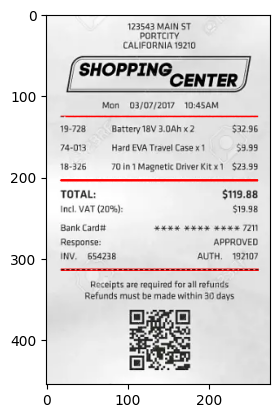

In [43]:
copy_img = input_img.copy()

for cur_line in lines:
    
  start_point = (cur_line[0][0], cur_line[0][1])
  end_point = (cur_line[0][2], cur_line[0][3])
  color = (255,0,0)
  thinkness = 1
  copy_img = cv2.line(
    img=copy_img,
    pt1=start_point, 
    pt2=end_point,
    color=color,
    thickness=thinkness)
plt.imshow(copy_img)